Setup

In [244]:
# %pip install paddlepaddle-gpu
# %pip install groq -y
# !conda install numpy groq paddlepaddle -y
# !pip install pillow==9.5.0


In [245]:
# !wget https://github.com/adobe-fonts/source-code-pro/raw/release/OTF/SourceCodePro-Regular.otf -O ../data/fonts/SourceCodePro-Regular.otf

In [246]:
# !wget https://github.com/googlefonts/noto-fonts/blob/main/hinted/ttf/NotoSansKannada/NotoSansKannada-Regular.ttf?raw=true -O ../data/fonts/NotoSansKannada-Regular.ttf

In [247]:
# !sudo mv NotoSansKannada-Regular.ttf /usr/share/fonts/

In [248]:
# !sudo fc-cache -f -v

In [249]:
# !fc-list | grep Kannada

# OCR with bounding boxes

In [250]:
# %pip install albumentations --user

In [251]:
print("hi")

hi


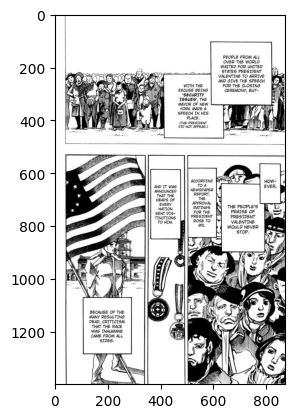

In [219]:
import cv2
import matplotlib.pyplot as plt
image_path = '../data/images/jojo-no-kimyou-na-bouken-part-7-steel-ball-run-chapter-95/36.jpg'

plt.imshow(cv2.imread(image_path))

In [252]:
from paddleocr import PaddleOCR, draw_ocr
import matplotlib.pyplot as plt
from PIL import Image

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Path to your image
# image_path = '../data/images/36.jpg'

# Perform OCR on the image
result = ocr.ocr(image_path, cls=True)

# Extract bounding boxes and text
boxes = [line[0] for line in result[0]]
texts = [line[1][0] for line in result[0]]

# Print bounding boxes and text
for box, text in zip(boxes, texts):
    print(f"Box: {box}, Text: {text}")

# Visualize the results
image = Image.open(image_path).convert('RGB')

[2024/10/19 16:39:58] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/akxy4321/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/akxy4321/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text

In [253]:
for idx in range(len(result)):
    res = result[idx]
    if res == None:
        continue
    boxes = [line[0] for line in res]
    txts = [line[1][0] for line in res]
    scores = [line[1][1] for line in res]
    im_show = draw_ocr(image, boxes, txts, scores, font_path = '../data/fonts/SourceCodePro-Regular.otf')
    im_show = Image.fromarray(im_show)
    im_show.save(f'image_with_bounding_boxes{idx}.jpg')

In [222]:
# import cv2
# plt.imshow(cv2.imread('result_page_0.jpg'))

# Translation

In [223]:
# groq_translation.py
import json
from typing import Optional

from groq import Groq
from pydantic import BaseModel

# Set up the Groq client
client = Groq(api_key="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")

# Model for the translation
class Translation(BaseModel):
    text: str
    comments: Optional[str] = None


# Translate text using the Groq API
def groq_translate(query, from_language, to_language):
    # Create a chat completion
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": f"You are a helpful assistant that translates text from {from_language} to {to_language}."
                           f"You will only reply with the translation text and nothing else in JSON."
                           f" The JSON object must use the schema: {json.dumps(Translation.model_json_schema(), indent=2)}",
            },
            {
                "role": "user",
                "content": f"Translate '{query}' from {from_language} to {to_language}."
            }
        ],
        model="llama3-70b-8192", # "llama-3.2-90b-text-preview"
        temperature=0.2,
        max_tokens=1024,
        stream=False,
        response_format={"type": "json_object"},
    )
    # Return the translated text
    return Translation.model_validate_json(chat_completion.choices[0].message.content)

In [224]:
response = groq_translate("hi how are you", from_language="english", to_language="hindi")
text = response.text
text

'नमस्ते कैसे हो'

In [225]:
response = groq_translate("an apple a day keeps the doctor away", from_language="english", to_language="kannada")
text = response.text
text

'ಒಂದು ಸೇಬು ದಿನಕ್ಕೆ ವೈದ್ಯರನ್ನು ದೂರವಿಡುತ್ತದೆ'

In [226]:
response = groq_translate("Are you made of stardust? Because every moment with you feels like a glimpse of the universe", from_language="english", to_language="kannada")
text = response.text
text

'ನೀವು ಸ್ಟಾರ್ಡಸ್ಟ್ ಮಾಡಿದ್ದೀರಾ? ಏಕೆ ನೀವು ಜೊತೆಯಲ್ಲಿ ಕಳೆದ ಪ್ರತಿ ಕ್ಷಣವೂ ವಿಶ್ವದ ಒಂದು ಹೆಜ್ಜೆಯಂತೆ ಅನಿಸುತ್ತದೆ'

# Combining the two

In [227]:
boxes

[[[633.0, 153.0], [775.0, 153.0], [775.0, 172.0], [633.0, 172.0]],
 [[633.0, 172.0], [775.0, 172.0], [775.0, 191.0], [633.0, 191.0]],
 [[625.0, 189.0], [787.0, 189.0], [787.0, 208.0], [625.0, 208.0]],
 [[629.0, 210.0], [781.0, 210.0], [781.0, 224.0], [629.0, 224.0]],
 [[616.0, 224.0], [794.0, 224.0], [794.0, 243.0], [616.0, 243.0]],
 [[615.0, 242.0], [794.0, 242.0], [794.0, 261.0], [615.0, 261.0]],
 [[484.0, 262.0], [560.0, 262.0], [560.0, 278.0], [484.0, 278.0]],
 [[633.0, 264.0], [775.0, 264.0], [775.0, 278.0], [633.0, 278.0]],
 [[464.0, 278.0], [582.0, 278.0], [582.0, 297.0], [464.0, 297.0]],
 [[639.0, 280.0], [771.0, 280.0], [771.0, 299.0], [639.0, 299.0]],
 [[481.0, 299.0], [566.0, 299.0], [566.0, 313.0], [481.0, 313.0]],
 [[468.0, 315.0], [574.0, 315.0], [574.0, 331.0], [468.0, 331.0]],
 [[464.0, 332.0], [580.0, 332.0], [580.0, 351.0], [464.0, 351.0]],
 [[471.0, 351.0], [576.0, 351.0], [576.0, 366.0], [471.0, 366.0]],
 [[462.0, 366.0], [582.0, 366.0], [582.0, 385.0], [462.0, 385.

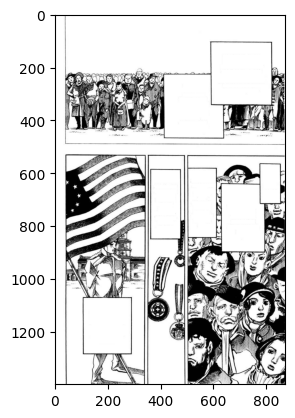

In [228]:
# prompt: these are the contents of boxes : [[[416.0, 278.0], [483.0, 276.0], [483.0, 294.0], [417.0, 296.0]],
#  [[417.0, 294.0], [482.0, 294.0], [482.0, 312.0], [417.0, 312.0]],
#  [[429.0, 312.0], [470.0, 312.0], [470.0, 330.0], [429.0, 330.0]],
#  [[422.0, 330.0], [478.0, 330.0], [478.0, 347.0], [422.0, 347.0]],
#  [[421.0, 346.0], [478.0, 346.0], [478.0, 364.0], [421.0, 364.0]],
#  [[423.0, 365.0], [473.0, 365.0], [473.0, 382.0], [423.0, 382.0]]]. Draw a white box in the numpy image called 'image' and store the contents in a new image

import numpy as np
from PIL import Image

# Assuming 'image' is your NumPy image and 'boxes' is the list of bounding boxes

image_np = np.array(image)  # Convert PIL Image to NumPy array if needed

new_image = image_np.copy()  # Create a copy of the image to draw on

for box in boxes:
  x1, y1 = int(min(box[0][0], box[1][0])), int(min(box[0][1], box[1][1]))
  x2, y2 = int(max(box[2][0], box[3][0])), int(max(box[2][1], box[3][1]))
  cv2.rectangle(new_image, (x1, y1), (x2, y2), (255, 255, 255), -1)  # Draw a white filled rectangle

new_image_pil = Image.fromarray(new_image)
# Now you can save or display the new_image_pil
new_image_pil.save('image_with_white_boxes.jpg')
plt.imshow(new_image_pil)

## naive method of translating ocr text

In [229]:
# # prompt: modify this so that the text is written onto a new image called "translated_image", with the text written on the coordinates specified by box: [[416.0, 278.0], [483.0, 276.0], [483.0, 294.0], [417.0, 296.0]]. The original image is new_image_pil. Modify this code for it :
# # for box, text in zip(boxes, texts):
# #     translated_text = groq_translate(text, from_language="english", to_language="kannada").text

# from paddleocr import PaddleOCR, draw_ocr
# import matplotlib.pyplot as plt
# from PIL import Image
# import cv2
# import json
# from typing import Optional
# from groq import Groq
# from pydantic import BaseModel
# from PIL import ImageDraw, ImageFont

# translated_image = new_image_pil.copy()
# draw = ImageDraw.Draw(translated_image)
# font = ImageFont.truetype("../data/fonts/NotoSansKannada-Regular.ttf", size=20)


# for box, text in zip(boxes, texts):
#     translated_text = groq_translate(text, from_language="english", to_language="kannada").text
#     # Assuming 'box' is a list of coordinates [x1, y1, x2, y2]
#     x1, y1 = int(box[0][0]), int(box[0][1])
#     x2, y2 = int(box[2][0]), int(box[2][1])

#     # Calculate the center point of the bounding box
#     # x_center = (x1 + x2) // 2
#     # y_center = (y1 + y2) // 2
#     # Define coordinates for text placement within the box
#     text_x = x1
#     text_y = y1

#     draw.text((text_x, text_y), translated_text, fill=(0, 0, 0), font=font)

# # Save the image with the translated text
# translated_image.save("translated_image.jpg")

# plt.imshow(translated_image)

BadRequestError: Error code: 400 - {'error': {'message': "Failed to generate JSON. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'json_validate_failed', 'failed_generation': '{\n   "text": "\\u0cae\\u0cc6\\u0n1\\u0cbf\\u0c82 \\u0d1f\\u0cbf\\u0c82-",\n   "comments": null\n}'}}

## here, we can see that it doesn't group the sentences properly --> which results in incorrect translation.

In [230]:
boxes

[[[633.0, 153.0], [775.0, 153.0], [775.0, 172.0], [633.0, 172.0]],
 [[633.0, 172.0], [775.0, 172.0], [775.0, 191.0], [633.0, 191.0]],
 [[625.0, 189.0], [787.0, 189.0], [787.0, 208.0], [625.0, 208.0]],
 [[629.0, 210.0], [781.0, 210.0], [781.0, 224.0], [629.0, 224.0]],
 [[616.0, 224.0], [794.0, 224.0], [794.0, 243.0], [616.0, 243.0]],
 [[615.0, 242.0], [794.0, 242.0], [794.0, 261.0], [615.0, 261.0]],
 [[484.0, 262.0], [560.0, 262.0], [560.0, 278.0], [484.0, 278.0]],
 [[633.0, 264.0], [775.0, 264.0], [775.0, 278.0], [633.0, 278.0]],
 [[464.0, 278.0], [582.0, 278.0], [582.0, 297.0], [464.0, 297.0]],
 [[639.0, 280.0], [771.0, 280.0], [771.0, 299.0], [639.0, 299.0]],
 [[481.0, 299.0], [566.0, 299.0], [566.0, 313.0], [481.0, 313.0]],
 [[468.0, 315.0], [574.0, 315.0], [574.0, 331.0], [468.0, 331.0]],
 [[464.0, 332.0], [580.0, 332.0], [580.0, 351.0], [464.0, 351.0]],
 [[471.0, 351.0], [576.0, 351.0], [576.0, 366.0], [471.0, 366.0]],
 [[462.0, 366.0], [582.0, 366.0], [582.0, 385.0], [462.0, 385.

In [231]:
texts

['PEOPLE FROM ALL',
 'OVER THE WORLD',
 'WAITED FOR UNITED',
 'STATES PRESIDENT',
 'VALENTINE TO ARRIVE',
 'AND GIVE THE SPEECH',
 'WTTTTTE',
 'FOR THE CLOSING',
 'EXCUSE BEING',
 'CEREMONY,BUT-',
 "'SECURITY",
 "ISSUES',THE",
 'MAYOR OF NEW',
 'YORK MADE A',
 'SPEECH IN HIS',
 'PLACE.',
 'THE PRESIDENT',
 'DID NOT APPEAR.)',
 'ACCORDING',
 'HOW-',
 'AND IT WAS',
 'TOA',
 'EVER,',
 'ANNOUNCED',
 'NEWSPAPER',
 'THAT THE',
 'REPORT,',
 'HEADS OF',
 'THE',
 'EVERY',
 'APPROVAL',
 'RATINGS',
 "THE PEOPLE'S",
 'NATION',
 'SENT DIS-',
 'FOR THE',
 'PRAISE OF',
 'TINNNNNNS',
 'PRESIDENT',
 'PRESIDENT',
 'TOHIM.',
 'ROSETO',
 'VALENTINE',
 '91%.',
 'WOULD NEVER',
 'STOP.',
 'BECAUISE OF THE',
 'MANY RESULTING',
 'DEAD,CRITICISM',
 'THAT THE RACE',
 'WAS INHUMANE',
 'CAMEFROM ALL',
 "'SOEES"]

In [232]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "system",
            "content": "You must convert the given array of strings into a coherent sentence",
        },
        {
            "role": "user",
            "content": f"{texts}",
        }
    ],
    model="llama3-70b-8192",
)

coherent_sentence = chat_completion.choices[0].message.content
print(coherent_sentence)

Here is a rewritten version of the text in a coherent sentence structure:

People from all over the world waited for United States President Valentine to arrive and give the speech for the closing ceremony, but due to security issues, the Mayor of New York made a speech in his place. The President did not appear. According to the newspaper report, the people's approval ratings rose to 91% for the President. However, it was announced that the event would never stop because of the many resulting dead, following criticism that the race was inhumane, which came from all sides.


In [233]:
# translated_text = groq_translate(coherent_sentence, from_language="english", to_language="kannada").text
# translated_text

In [234]:
# boxes

In [235]:
def get_bounding_box(rectangle):
    """
    Given a rectangle defined by its corner coordinates, return the bounding box.

    Parameters:
    - rectangle: A list of four points, where each point is a list of [x, y].

    Returns:
    - A tuple (x_min, y_min, x_max, y_max) representing the bounding box.
    """
    x_coords = [point[0] for point in rectangle]
    y_coords = [point[1] for point in rectangle]

    x_min = min(x_coords)
    y_min = min(y_coords)
    x_max = max(x_coords)
    y_max = max(y_coords)

    return (x_min, y_min, x_max, y_max)

# Get bounding boxes for each rectangle
bounding_boxes = [get_bounding_box(rect) for rect in boxes]

bounding_boxes

[(633.0, 153.0, 775.0, 172.0),
 (633.0, 172.0, 775.0, 191.0),
 (625.0, 189.0, 787.0, 208.0),
 (629.0, 210.0, 781.0, 224.0),
 (616.0, 224.0, 794.0, 243.0),
 (615.0, 242.0, 794.0, 261.0),
 (484.0, 262.0, 560.0, 278.0),
 (633.0, 264.0, 775.0, 278.0),
 (464.0, 278.0, 582.0, 297.0),
 (639.0, 280.0, 771.0, 299.0),
 (481.0, 299.0, 566.0, 313.0),
 (468.0, 315.0, 574.0, 331.0),
 (464.0, 332.0, 580.0, 351.0),
 (471.0, 351.0, 576.0, 366.0),
 (462.0, 366.0, 582.0, 385.0),
 (495.0, 385.0, 547.0, 401.0),
 (468.0, 404.0, 574.0, 418.0),
 (464.0, 417.0, 582.0, 436.0),
 (514.0, 622.0, 599.0, 638.0),
 (786.0, 619.0, 839.0, 643.0),
 (375.0, 646.0, 461.0, 660.0),
 (536.0, 640.0, 576.0, 656.0),
 (787.0, 641.0, 839.0, 662.0),
 (375.0, 662.0, 461.0, 678.0),
 (511.0, 657.0, 600.0, 673.0),
 (383.0, 679.0, 454.0, 695.0),
 (523.0, 673.0, 587.0, 689.0),
 (381.0, 695.0, 454.0, 711.0),
 (540.0, 689.0, 571.0, 705.0),
 (392.0, 713.0, 444.0, 729.0),
 (517.0, 707.0, 590.0, 723.0),
 (521.0, 724.0, 589.0, 740.0),
 (650.0,

In [236]:
boxes

[[[633.0, 153.0], [775.0, 153.0], [775.0, 172.0], [633.0, 172.0]],
 [[633.0, 172.0], [775.0, 172.0], [775.0, 191.0], [633.0, 191.0]],
 [[625.0, 189.0], [787.0, 189.0], [787.0, 208.0], [625.0, 208.0]],
 [[629.0, 210.0], [781.0, 210.0], [781.0, 224.0], [629.0, 224.0]],
 [[616.0, 224.0], [794.0, 224.0], [794.0, 243.0], [616.0, 243.0]],
 [[615.0, 242.0], [794.0, 242.0], [794.0, 261.0], [615.0, 261.0]],
 [[484.0, 262.0], [560.0, 262.0], [560.0, 278.0], [484.0, 278.0]],
 [[633.0, 264.0], [775.0, 264.0], [775.0, 278.0], [633.0, 278.0]],
 [[464.0, 278.0], [582.0, 278.0], [582.0, 297.0], [464.0, 297.0]],
 [[639.0, 280.0], [771.0, 280.0], [771.0, 299.0], [639.0, 299.0]],
 [[481.0, 299.0], [566.0, 299.0], [566.0, 313.0], [481.0, 313.0]],
 [[468.0, 315.0], [574.0, 315.0], [574.0, 331.0], [468.0, 331.0]],
 [[464.0, 332.0], [580.0, 332.0], [580.0, 351.0], [464.0, 351.0]],
 [[471.0, 351.0], [576.0, 351.0], [576.0, 366.0], [471.0, 366.0]],
 [[462.0, 366.0], [582.0, 366.0], [582.0, 385.0], [462.0, 385.

## one way to overcome the incorrect grouping is by merging overlapping boxes/ boxes with common edges into one, and then considering each "big" group of texts as one sentence : this results in more accurate translation

In [237]:
# def merge_bounding_boxes_with_texts(bboxes, texts, horizontal_threshold=10, vertical_threshold=15):
#     """
#     Merge bounding boxes and corresponding texts that are close to each other into larger boxes.

#     Parameters:
#     - bboxes: List of bounding boxes (x_min, y_min, x_max, y_max)
#     - texts: List of texts corresponding to the bounding boxes
#     - horizontal_threshold: Max horizontal distance to merge
#     - vertical_threshold: Max vertical distance to merge

#     Returns:
#     - List of merged bounding boxes and corresponding texts
#     """
#     if len(bboxes) == 0 or len(texts) == 0:
#         return [], []

#     # Sort bounding boxes and texts by the y coordinate (top-left corner)
#     indexed_bboxes = sorted(enumerate(bboxes), key=lambda x: x[1][1])
#     sorted_texts = [texts[i] for i, _ in indexed_bboxes]
#     sorted_bboxes = [b[1] for b in indexed_bboxes]

#     merged_boxes = []
#     merged_texts = []
#     current_box = list(sorted_bboxes[0])  # Start with the first bounding box
#     current_text = sorted_texts[0]         # Start with the first text

#     for i in range(1, len(sorted_bboxes)):
#         next_box = sorted_bboxes[i]
#         next_text = sorted_texts[i]

#         # Check for vertical proximity
#         if (next_box[1] <= current_box[3] + vertical_threshold) and \
#            (next_box[0] <= current_box[2] + horizontal_threshold):
#             # Extend current box and concatenate texts
#             current_box[0] = min(current_box[0], next_box[0])  # Update x_min
#             current_box[1] = min(current_box[1], next_box[1])  # Update y_min
#             current_box[2] = max(current_box[2], next_box[2])  # Update x_max
#             current_box[3] = max(current_box[3], next_box[3])  # Update y_max
#             current_text += ' ' + next_text                      # Concatenate text
#         else:
#             # No proximity, add current box and text to merged list and start new ones
#             merged_boxes.append(tuple(current_box))
#             merged_texts.append(current_text)
#             current_box = list(next_box)
#             current_text = next_text

#     # Add the last box and text
#     merged_boxes.append(tuple(current_box))
#     merged_texts.append(current_text)

#     return merged_boxes, merged_texts

# # Example bounding boxes (x_min, y_min, x_max, y_max) and their corresponding texts
# # bounding_boxes = [
# #     (50, 100, 80, 120),  # "A"
# #     (50, 125, 80, 145),  # "man"
# #     (50, 150, 80, 170),  # "is"
# #     (150, 100, 180, 120), # "a"
# #     (150, 125, 180, 145)  # "cat"
# # ]
# # texts = [
# #     "A",
# #     "man",
# #     "is",
# #     "a",
# #     "cat"
# # ]

# merged_bboxes, merged_texts = merge_bounding_boxes_with_texts(bounding_boxes, texts)
# print("Merged Bounding Boxes:", merged_bboxes)
# print("Merged Texts:", merged_texts)



def intersecting_boxes(box1, box2, threshold=3):
    """
    Check if two boxes intersect with a given threshold, considering both expansion (+threshold)
    and contraction (-threshold).

    Args:
        box1 (list): Coordinates of the first box [(x1, y1), (x2, y2), (x3, y3), (x4, y4)].
        box2 (list): Coordinates of the second box [(x1, y1), (x2, y2), (x3, y3), (x4, y4)].
        threshold (float): Distance threshold for considering boxes as intersecting.

    Returns:
        bool: True if the boxes intersect within the threshold, False otherwise.
    """
    
    # Extract x and y coordinates for both boxes
    x1_coords = [point[0] for point in box1]
    x2_coords = [point[0] for point in box2]
    y1_coords = [point[1] for point in box1]
    y2_coords = [point[1] for point in box2]

    # Determine the bounding box for both sets of coordinates
    x1_min, y1_min = min(x1_coords), min(y1_coords)
    x1_max, y1_max = max(x1_coords), max(y1_coords)

    x2_min, y2_min = min(x2_coords), min(y2_coords)
    x2_max, y2_max = max(x2_coords), max(y2_coords)

    # Check if the boxes intersect considering both expansion (+threshold) and contraction (-threshold)
    
    # For x-coordinates
    x_overlap_expanded = not (x1_max + threshold < x2_min or x2_max + threshold < x1_min)
    x_overlap_contracted = not (x1_max - threshold < x2_min or x2_max - threshold < x1_min)
    
    # For y-coordinates
    y_overlap_expanded = not (y1_max + threshold < y2_min or y2_max + threshold < y1_min)
    y_overlap_contracted = not (y1_max - threshold < y2_min or y2_max - threshold < y1_min)

    # Return True if either expanded or contracted ranges overlap in both x and y coordinates
    return (x_overlap_expanded and y_overlap_expanded) or (x_overlap_contracted and y_overlap_contracted)





def merge_boxes(box1, box2):
    """
    Merges two boxes.

    Args:
        box1 (list): The first box.
        box2 (list): The second box.

    Returns:
        list: The merged box.
    """

    x_coords = [point[0] for point in box1+box2]
    y_coords = [point[1] for point in box1+box2]

    x1 = min(x_coords)
    x2 = max(x_coords)
    y1 = min(y_coords)
    y2 = max(y_coords)

    return [(x1, y1), (x2, y1), (x2, y2), (x1, y2)]

def merge_intersecting_boxes(super_boxes):
    """
    Merges intersecting boxes.

    Args:
        boxes (list): A list of boxes.

    Returns:
        list: A list of merged boxes.
    """
    merged_super_boxes = []
    for super_box in super_boxes:
        box, text = super_box
        if not merged_super_boxes:
            merged_super_boxes.append(super_box)
        else:
            intersecting = False
            for i, merged_super_box in enumerate(merged_super_boxes):
                merged_box, merged_text = merged_super_box
                if intersecting_boxes(merged_box, box):

                    new_super_box = (merge_boxes(merged_box, box), merged_text + " " + text)

                    merged_super_boxes[i] = new_super_box
                    intersecting = True
                    break
            if not intersecting:
                merged_super_boxes.append(super_box)
    return merged_super_boxes

super_boxes = list(zip(boxes, texts))
super_boxes.sort(key=lambda super_box:super_box[0][1], reverse=True)
merged_boxes = merge_intersecting_boxes(super_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
merged_boxes = merge_intersecting_boxes(merged_boxes)
print(merged_boxes)

[([(786.0, 619.0), (839.0, 619.0), (839.0, 662.0), (786.0, 662.0)], 'EVER, HOW-'), ([(615.0, 153.0), (794.0, 153.0), (794.0, 299.0), (615.0, 299.0)], 'AND GIVE THE SPEECH VALENTINE TO ARRIVE STATES PRESIDENT FOR THE CLOSING CEREMONY,BUT- WAITED FOR UNITED OVER THE WORLD PEOPLE FROM ALL'), ([(649.0, 718.0), (772.0, 718.0), (772.0, 832.0), (649.0, 832.0)], "WOULD NEVER VALENTINE STOP. PRESIDENT THE PEOPLE'S PRAISE OF"), ([(511.0, 622.0), (600.0, 622.0), (600.0, 807.0), (511.0, 807.0)], 'NEWSPAPER REPORT, TOA THE ACCORDING APPROVAL RATINGS PRESIDENT ROSETO FOR THE 91%.'), ([(462.0, 262.0), (582.0, 262.0), (582.0, 436.0), (462.0, 436.0)], "DID NOT APPEAR.) THE PRESIDENT PLACE. SPEECH IN HIS YORK MADE A MAYOR OF NEW ISSUES',THE EXCUSE BEING 'SECURITY WTTTTTE"), ([(375.0, 646.0), (461.0, 646.0), (461.0, 796.0), (375.0, 796.0)], 'ANNOUNCED AND IT WAS THAT THE HEADS OF TINNNNNNS SENT DIS- TOHIM. NATION EVERY'), ([(128.0, 1118.0), (266.0, 1118.0), (266.0, 1246.0), (128.0, 1246.0)], "DEAD,CRITIC

[(786.0, 619.0), (839.0, 619.0), (839.0, 662.0), (786.0, 662.0)]
[(615.0, 153.0), (794.0, 153.0), (794.0, 299.0), (615.0, 299.0)]
[(649.0, 718.0), (772.0, 718.0), (772.0, 832.0), (649.0, 832.0)]
[(511.0, 622.0), (600.0, 622.0), (600.0, 807.0), (511.0, 807.0)]
[(462.0, 262.0), (582.0, 262.0), (582.0, 436.0), (462.0, 436.0)]
[(375.0, 646.0), (461.0, 646.0), (461.0, 796.0), (375.0, 796.0)]
[(128.0, 1118.0), (266.0, 1118.0), (266.0, 1246.0), (128.0, 1246.0)]


True

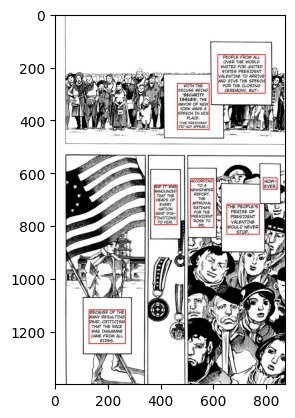

In [238]:
np_image = np.array(image)
for box,text in merged_boxes:
    a, b, c, d = box  # Unpacking the box coordinates
    ycoords = [a[1], b[1], c[1], d[1]]  # Y-coordinates of the box corners
    xcoords = [a[0], b[0], c[0], d[0]]  # X-coordinates of the box corners

    # Calculate the width and height of the bounding box
    width = max(xcoords) - min(xcoords)
    height = max(ycoords) - min(ycoords)

    # Skip boxes with zero width or height
    if width <= 0 or height <= 0:
        continue

    print(box)  # Optional: print the box coordinates for debugging
    # Draw the rectangle on the image
    cv2.rectangle(img=np_image, pt1=(int(min(xcoords)), int(min(ycoords))), \
                    pt2=(int(max(xcoords)), int(max(ycoords))), \
                    color=(255, 0, 0), thickness=2)  # red boxes with thickness 2
import matplotlib.pyplot as plt
plt.imshow(np_image)
cv2.imwrite("image with merged bounding boxes.jpeg", np_image)

In [239]:
for a in enumerate(merged_bboxes):
    print(a) # , key=lambda x: x[1][1])

(0, (407.0, 23.0, 860.0, 226.0))
(1, (140.0, 547.0, 298.0, 573.0))
(2, (33.0, 561.0, 486.0, 720.0))
(3, (37.0, 1107.0, 127.0, 1127.0))
(4, (38.0, 1116.0, 476.0, 1238.0))


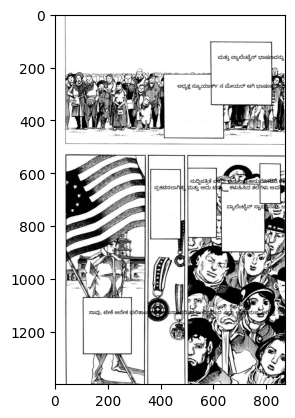

In [240]:
translated_image = new_image_pil.copy()
draw = ImageDraw.Draw(translated_image)
font = ImageFont.truetype("../data/fonts/NotoSansKannada-Regular.ttf", size=20)


for box, text in merged_boxes:
    translated_text = groq_translate(text, from_language="english", to_language="kannada").text

    x1, y1, x2, y2 = get_bounding_box(box) # convert from 4 point to 4 coords

    # Calculate the center point of the bounding box
    # x_center = (x1 + x2) // 2
    # y_center = (y1 + y2) // 2
    # Define coordinates for text placement within the box
    text_x = x1
    text_y = y1

    draw.text((text_x, text_y), translated_text, fill=(0, 0, 0), font=font)

# Save the image with the translated text
translated_image.save("translated_image_better.jpg")

plt.imshow(translated_image)

## ok, now a new problem is improper text filling

In [241]:
# %pip install Pillow==9.5.0

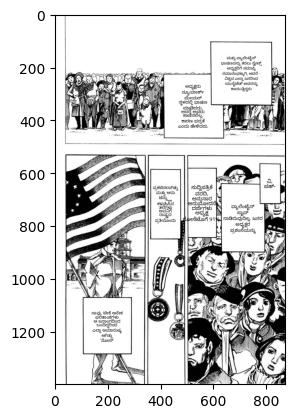

In [242]:
import textwrap
from PIL import Image, ImageDraw, ImageFont

translated_image = new_image_pil.copy()
draw = ImageDraw.Draw(translated_image)
font = ImageFont.truetype("../data/fonts/NotoSansKannada-Regular.ttf", size=20)

def draw_text_in_rectangle(image, text, font_path, box, max_font_size):
    draw = ImageDraw.Draw(image)
    x1, y1, x2, y2 = box
    w, h = x2 - x1, y2 - y1

    for font_size in range(max_font_size, 0, -1):
        font = ImageFont.truetype(font_path, font_size)
        # Initial wrap based on bounding box width
        lines = textwrap.wrap(text, width=int(w / draw.textbbox((0, 0), ' ', font=font)[2]))
        wrapped_lines = []
        for line in lines:
            # Further wrap each line if it exceeds the bounding box width
            while draw.textbbox((0, 0), line, font=font)[2] > w:
                split_index = line.rfind(' ', 0, int(len(line) * w / draw.textbbox((0, 0), line, font=font)[2]))
                if split_index == -1:
                    break
                wrapped_lines.append(line[:split_index])
                line = line[split_index + 1:]
            wrapped_lines.append(line)
        
        total_text_height = sum([draw.textbbox((0, 0), line, font=font)[3] for line in wrapped_lines])
        if total_text_height <= h:
            y_offset = y1 + (h - total_text_height) // 2
            for line in wrapped_lines:
                line_width, line_height = draw.textbbox((0, 0), line, font=font)[2], draw.textbbox((0, 0), line, font=font)[3]
                draw.text(((x1 + (w - line_width) // 2), y_offset), line, font=font, fill="black")
                y_offset += line_height
            break
    return image

# Use the function to draw text in each bounding box
for box, text in merged_boxes:
    translated_text = groq_translate(text, from_language="english", to_language="kannada").text
    translated_image = draw_text_in_rectangle(translated_image, translated_text, "../data/fonts/NotoSansKannada-Regular.ttf", get_bounding_box(box), max_font_size=20)

# Save the image with the translated text
translated_image.save("translated_image_better.jpg")

plt.imshow(translated_image)

In [243]:
merged_texts

['HEY! GETTHIS COME EVERYONE HERE, CRATEOFF GATHER AROUND! EVERY- HEREBY RIGHT ONE! BRUTE OVER HERE! FORCE!',
 "IT'S NYO-",
 "WHAT ARE ALREADY HOHO YOU TRYING IMPOS- TO DO..... SIBLE. THERE'S NO WAY YOU'VEGOT I'M TAKING THIS OFF THE BUT TO BUG BOAT... OFF.",
 "WEDON'T",
 'AND IF HAVE A NECESSARY, PROBLEM YOU GOGET HERE,DO AUTHORI- WE? ZATION! ..GOTIT?']